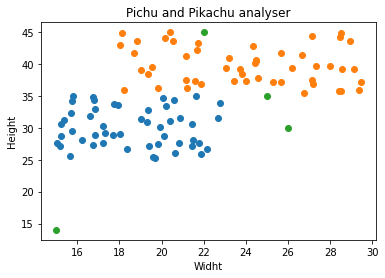

In [1]:
import matplotlib.pyplot as plt
import numpy as np

pichuFiles = "files/pichu.txt"
pikachuFiles = "files/pikachu.txt"
testPointsFiles = "files/test_points.txt"

listIndex = 0

pichuWidht = []
pichuHeight = []
pikachuWidht = []
pikachuHeight = []
testPointsList = []
testPointsWidth = []
testPointsHeight = []

with open(pichuFiles, "r") as pichu, open(pikachuFiles, "r") as pikachu:    ## Opens the files as a variable for easy use
    for i, pichuData in enumerate(pichu.readlines()):     ## Creats a for loop that reads the data from a specifc file line by line.
        if i == 0:  ## Skips the first line so that it does not get read
            continue

        pichuData = pichuData.replace("(", "")  ## Removes ( from the string
        pichuData = pichuData.replace(")", "")  ## - || -  ) -     ||     -
        pichuData = pichuData.replace("\n", "") ## Removes newlines

        widht, height = pichuData.split(",")    # Splits the data into two diffrent points

        pichuWidht.append(widht)
        pichuHeight.append(height)
    
    for i, pikachuData in enumerate(pikachu.readlines()):
        if i == 0:
            continue

        pikachuData = pikachuData.replace("(", "")
        pikachuData = pikachuData.replace(")", "")
        pikachuData = pikachuData.replace("\n", "")

        widht, height = pikachuData.split(",")

        pikachuWidht.append(widht)
        pikachuHeight.append(height)

with open(testPointsFiles, "r") as testPoint:
    testPoints = testPoint.readline()
    testPoints = testPoints.replace("(", "")
    testPoints = testPoints.replace(" ", "")
    testPoints = testPoints.replace(")", "")
    testPointsList = testPoints.split(",")

testPointsList = [float(i) for i in testPointsList]
        
for i in testPointsList:
    if listIndex % 2 == 0:
        testPointsWidth.append(testPointsList[listIndex])
        listIndex += 1
    elif listIndex % 2 != 0:
        testPointsHeight.append(testPointsList[listIndex])
        listIndex += 1

pichuWidht = [float(i) for i in pichuWidht]     ##Converts all strings in the list to floats
pichuHeight = [float(i) for i in pichuHeight]

pikachuWidht = [float(i) for i in pikachuWidht]
pikachuHeight = [float(i) for i in pikachuHeight]

pichuWidhtPoints = np.array(pichuWidht)     ## Creats an array out of the list pichuWidht 
pichuHeightPoints = np.array(pichuHeight)   ## Information and cod taken from -> https://www.codespeedy.com/how-to-plot-points-in-matplotlib-with-python/

pikachuWidhtPoints = np.array(pikachuWidht)
pikachuHeightPoints = np.array(pikachuHeight)

testWidht = np.array(testPointsWidth)
testHeight = np.array(testPointsHeight)

plt.scatter(pichuWidhtPoints, pichuHeightPoints)
plt.scatter(pikachuWidhtPoints, pikachuHeightPoints)
plt.scatter(testWidht, testHeight)
plt.xlabel("Widht")
plt.ylabel("Height")
plt.title("Pichu and Pikachu analyser")
plt.show()